In [714]:
import pandas as pd
from ydata_profiling import ProfileReport

In [715]:
# Load the data from wec.csv
wec_analysis = pd.read_csv('C:\Data Science\Projetos\wec-analysis\Datasets\wec_data.csv', sep=',')

In [716]:
#taking a look at the database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   group             428 non-null    object 
 7   race              3035 non-null   object 
 8   event_duration    3035 non-null   int64  
 9   season            3035 non-null   object 
 10  laps              3035 non-null   int64  
 11  total_time        3026 non-null   object 
 12  gap_first         2948 non-null   object 
 13  gap_car_ahead     2946 non-null   object 
 14  tyres             3035 non-null   object 
 15  status            3035 non-null   object 
 16  fl_lap_number     3022 non-null   float64


In [717]:
#dropping a few columns
# Drop the columns driver_1, driver_2, and driver_3 from the wec_analysis DataFrame
wec_analysis.drop(['driver_1', 'driver_2', 'driver_3'], axis=1, inplace=True)

In [718]:
#taking a look at the updated database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   group             428 non-null    object 
 7   race              3035 non-null   object 
 8   event_duration    3035 non-null   int64  
 9   season            3035 non-null   object 
 10  laps              3035 non-null   int64  
 11  total_time        3026 non-null   object 
 12  gap_first         2948 non-null   object 
 13  gap_car_ahead     2946 non-null   object 
 14  tyres             3035 non-null   object 
 15  status            3035 non-null   object 
 16  fl_lap_number     3022 non-null   float64


In [719]:
#taking a look at the updated database
wec_analysis.sample(10)

,car,overall_position,class_position,team,vehicle,class,group,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average
2287,Prema Racing #63,50,21,Prema Racing,Oreca 07 - Gibson,LMP2,NaN,LeMans,24,2023,113,9:35:28.976,229 Laps,4 Laps,Goodyear,Retired,65.0,3:39.270,223.7
2329,Iron Lynx #60,30,11,Iron Lynx,Porsche 911 RSR - 19,LMGTE Am,NaN,Spa,6,2023,137,6:02:24.593,11 Laps,1 Laps,Michelin,Classified,122.0,2:15.459,186.1
1101,Porsche GT Team #91,16,3,Porsche GT Team,Porsche 911 RSR,LMGTE Pro,NaN,Mexico,6,2017,208,6:00:55.544,32 Laps,1 Laps,Michelin,Classified,183.0,1:40.889,153.6
1966,IDEC Sport #48,12,8,IDEC Sport,Oreca 07 - Gibson,LMP2,NaN,LeMans,24,2022,366,24:02:31.743,14 Laps,1 Laps,Goodyear,Classified,292.0,3:31.601,231.8
2492,Audi Sport Team Joest #1,48,11,Audi Sport Team Joest,Audi R18 TDI,LM P1,NaN,LeMans,24,2011,116,7:37:45.596,239 Laps,3 Laps,Michelin,Retired,3.0,3:28.389,235.4
587,Audi Sport Team Joest #7,2,2,Audi Sport Team Joest,Audi R18,LMP1,H,Bahrain,6,2016,201,6:00:28.806,16.419,16.419,Michelin,Classified,130.0,1:42.634,189.8
1148,Rebellion Racing #3,3,3,Rebellion Racing,Rebellion R13 - Gibson,LMP1,NaN,Spa,6,2018-2019,161,6:02:02.819,2 Laps,2 Laps,Michelin,Classified,43.0,1:58.820,212.2
567,Ford Chip Ganassi Team UK #67,16,2,Ford Chip Ganassi Team UK,Ford GT,LMGTE Pro,NaN,Spa,6,2016,144,6:02:45.331,16 Laps,30.627,Michelin,Classified,46.0,2:19.999,180.1
709,Manor #45,30,10,Manor,Oreca 05 - Nissan,LMP2,NaN,Nurburgring,6,2016,149,5:03:58.056,45 Laps,6 Laps,Dunlop,Not classified,4.0,1:51.381,166.0
1576,Dempsey - Proton Racing #77,24,5,Dempsey - Proton Racing,Porsche 911 RSR,LMGTE Am,NaN,Cota,6,2019-2020,169,6:02:25.223,20 Laps,1 Laps,Michelin,Classified,157.0,2:03.508,160.7


In [720]:
#Using ydata profiling for another more in depth visualization
#profile = ProfileReport(wec_analysis, title="Wec Analysis")
#profile.to_file("wec-analysis.html")

In [721]:
# Display rows with missing values in the 'gap_first' column in the wec_analysis DataFrame
missing_gap_first = wec_analysis[wec_analysis['gap_first'].isnull()]
missing_gap_first

,car,overall_position,class_position,team,vehicle,class,group,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average
0,Toyota Racing #8,1,1,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,H,Silverstone,6,2014,167,5:22:42.296,NaN,NaN,Michelin,Classified,112.0,1:44.646,202.7
27,Toyota Racing #8,1,1,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,H,Spa,6,2014,171,6:01:31.675,NaN,NaN,Michelin,Classified,119.0,2:01.327,207.8
55,Toyota Racing #7,1,1,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,H,Bahrain,6,2014,195,6:00:18.056,NaN,NaN,Michelin,Classified,80.0,1:46.377,183.2
82,Audi Sport Team Joest #2,1,1,Audi Sport Team Joest,Audi R18 e-tron quattro,LMP1,H,Cota,6,2014,157,6:01:52.122,NaN,NaN,Michelin,Classified,134.0,1:51.521,178.1
111,Toyota Racing #8,1,1,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,H,Fuji,6,2014,236,6:00:39.367,NaN,NaN,Michelin,Classified,222.0,1:27.815,187.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,Audi Sport Team Joest #1,1,1,Audi Sport Team Joest,Audi R18 e-tron quattro,LMP1,NaN,Shanghai,6,2013,190,6:01:33.343,NaN,NaN,Michelin,Classified,100.0,1:49.066,179.9
2894,Toyota Racing #7,1,1,Toyota Racing,Toyota TS030 - Hybrid,LMP1,NaN,Fuji,6,2013,16,2:56:05.785,NaN,NaN,Michelin,Classified,3.0,2:39.727,102.8
2923,Audi Sport Team Joest #1,1,1,Audi Sport Team Joest,Audi R18 e-tron quattro,LMP1,NaN,Interlagos,6,2013,235,6:01:26.209,NaN,NaN,Michelin,Classified,54.0,1:21.213,191.0
2951,Audi Sport Team Joest #2,1,1,Audi Sport Team Joest,Audi R18 e-tron quattro,LMP1,NaN,LeMans,24,2013,348,24:01:16.436,NaN,NaN,Michelin,Classified,86.0,3:23.269,241.4


In [722]:
#gap_first and gap_car_ahead is null because the car is in first position, lets fix that
# Fill missing values in 'gap_first' and 'gap_car_ahead' columns with 0 in the wec_analysis DataFrame
wec_analysis['gap_first'].fillna(0, inplace=True)
wec_analysis['gap_car_ahead'].fillna(0, inplace=True)

In [723]:
# Display rows with missing values in the 'gap_first' column in the wec_analysis DataFrame
missing_gap_first = wec_analysis[wec_analysis['gap_first'].isnull()]
missing_gap_first

,car,overall_position,class_position,team,vehicle,class,group,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average


In [724]:
#taking a look at the updated database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   group             428 non-null    object 
 7   race              3035 non-null   object 
 8   event_duration    3035 non-null   int64  
 9   season            3035 non-null   object 
 10  laps              3035 non-null   int64  
 11  total_time        3026 non-null   object 
 12  gap_first         3035 non-null   object 
 13  gap_car_ahead     3035 non-null   object 
 14  tyres             3035 non-null   object 
 15  status            3035 non-null   object 
 16  fl_lap_number     3022 non-null   float64


In [725]:
# Display rows with missing values in the 'total_time' column in the wec_analysis DataFrame
missing_total_time = wec_analysis[wec_analysis['total_time'].isnull()]
missing_total_time

,car,overall_position,class_position,team,vehicle,class,group,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average
243,KCMG #47,26,7,KCMG,Oreca 03R - Nissan,LMP2,NaN,Shanghai,6,2014,0,NaN,188 Laps,123 Laps,Dunlop,Not classified,NaN,NaN,NaN
244,AF Corse #51,27,6,AF Corse,Ferrari F458 Italia,LMGTE Pro,NaN,Shanghai,6,2014,0,NaN,188 Laps,0,Michelin,Not classified,NaN,NaN,NaN
803,Manor #45,31,10,Manor,Oreca 05 - Nissan,LMP2,NaN,Shanghai,6,2016,0,NaN,195 Laps,1 Laps,Dunlop,Not classified,NaN,NaN,NaN
1819,GR Racing #86,32,11,GR Racing,Porsche 911 RSR - 19,LMGTE Am,NaN,Spa,6,2021,0,NaN,162 Laps,125 Laps,Michelin,Retired,NaN,NaN,NaN
1820,ARC Bratislava #44,33,14,ARC Bratislava,Ligier JSP217 - Gibson,LMP2,P/A,Spa,6,2021,0,NaN,162 Laps,0,Goodyear,Retired,NaN,NaN,NaN
2576,AF Corse-Waltrip #61,41,9,AF Corse-Waltrip,Ferrari F458 Italia,LMGTE Am,NaN,Spa,6,2012,0,NaN,160 Laps,11 Laps,Michelin,Not started,NaN,NaN,NaN
2771,Luxury Racing #58,28,7,Luxury Racing,Ferrari F458 Italia,LM GTE Am,NaN,Sebring,12,2012,0,NaN,325 Laps,83 Laps,Michelin,Not classified,NaN,NaN,NaN
2865,Lotus #31,28,9,Lotus,Lotus T128,LMP2,NaN,Bahrain,6,2013,0,NaN,199 Laps,5 Laps,Dunlop,Not classified,NaN,NaN,NaN
3034,Lotus #31,28,9,Lotus,Lotus T128,LMP2,NaN,Cota,6,2013,0,NaN,187 Laps,84 Laps,Dunlop,Classified,NaN,NaN,NaN


In [726]:
#total_time, fl_lap_number,fl_time,fl_kph_average is null because some cars did not classify, did not start or retired from race,lets fix that
# Fill missing values in 'total_time', 'fl_lap_number', 'fl_time', and 'fl_kph_average' columns with 0 in the wec_analysis DataFrame
wec_analysis['total_time'].fillna(0, inplace=True)
wec_analysis['fl_lap_number'].fillna(0, inplace=True)
wec_analysis['fl_time'].fillna(0, inplace=True)
wec_analysis['fl_kph_average'].fillna(0, inplace=True)

In [727]:
# Display rows with missing values in the 'total_time' column in the wec_analysis DataFrame
missing_total_time = wec_analysis[wec_analysis['total_time'].isnull()]
missing_total_time

,car,overall_position,class_position,team,vehicle,class,group,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average


In [728]:
#taking a look at the updated database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   group             428 non-null    object 
 7   race              3035 non-null   object 
 8   event_duration    3035 non-null   int64  
 9   season            3035 non-null   object 
 10  laps              3035 non-null   int64  
 11  total_time        3035 non-null   object 
 12  gap_first         3035 non-null   object 
 13  gap_car_ahead     3035 non-null   object 
 14  tyres             3035 non-null   object 
 15  status            3035 non-null   object 
 16  fl_lap_number     3035 non-null   float64


In [729]:
# Display the unique values in the 'group' column of the wec_analysis DataFrame
wec_analysis['group'].unique()

array(['H', 'L', nan, 'P/A'], dtype=object)

In [730]:
# Drop the 'group' column from the wec_analysis DataFrame sinc eit doesnt give us much information
wec_analysis.drop('group', axis=1, inplace=True)

In [731]:
#taking a look at the updated database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   race              3035 non-null   object 
 7   event_duration    3035 non-null   int64  
 8   season            3035 non-null   object 
 9   laps              3035 non-null   int64  
 10  total_time        3035 non-null   object 
 11  gap_first         3035 non-null   object 
 12  gap_car_ahead     3035 non-null   object 
 13  tyres             3035 non-null   object 
 14  status            3035 non-null   object 
 15  fl_lap_number     3035 non-null   float64
 16  fl_time           3035 non-null   object 


We dont have any missing values now, lets start the data analysis

In [732]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

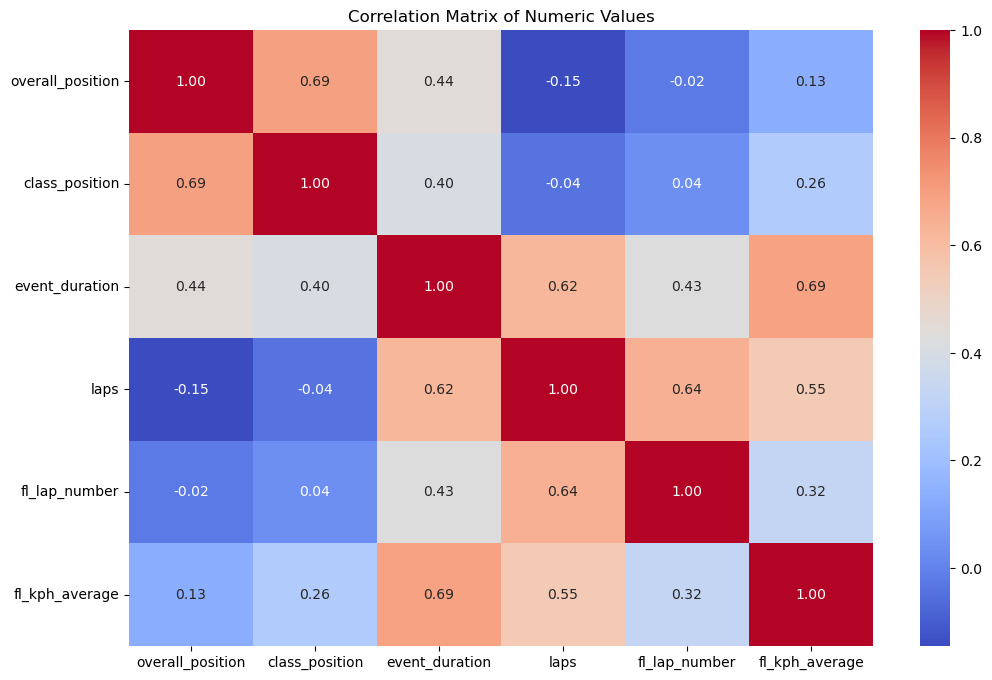

In [733]:
# Display a correlation matrix graph for the numeric columns in the wec_analysis DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Values')
plt.show()

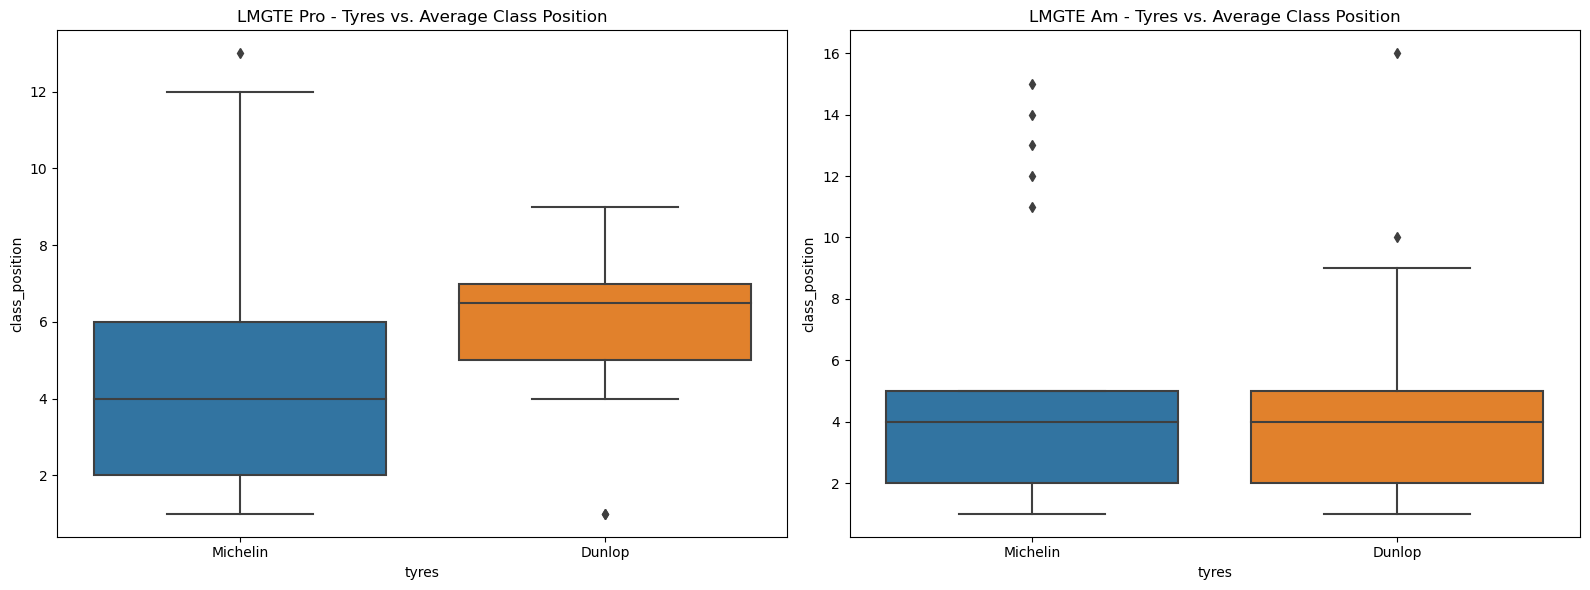

In [734]:
wec_analysis_2017_season = wec_analysis[(wec_analysis['season'] == '2017') & (wec_analysis['class'].isin(['LMGTE Pro', 'LMGTE Am']))]

if not wec_analysis_2017_season.empty:
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='tyres', y='class_position', data=wec_analysis_2017_season[wec_analysis_2017_season['class'] == 'LMGTE Pro'])
    plt.title('LMGTE Pro - Tyres vs. Average Class Position')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='tyres', y='class_position', data=wec_analysis_2017_season[wec_analysis_2017_season['class'] == 'LMGTE Am'])
    plt.title('LMGTE Am - Tyres vs. Average Class Position')
    
    plt.tight_layout()
    plt.show()
else:
    print("No data points available for the season '2017' in LMGTE PRO and LMGTE AM classes.")


We can see that in the Season 2017, Dunlop one only one race for the GTE Pro class while Michelin was vastly superior overall. In GTE Am, things were much closer, both Tyre suppliers had a similiar season.

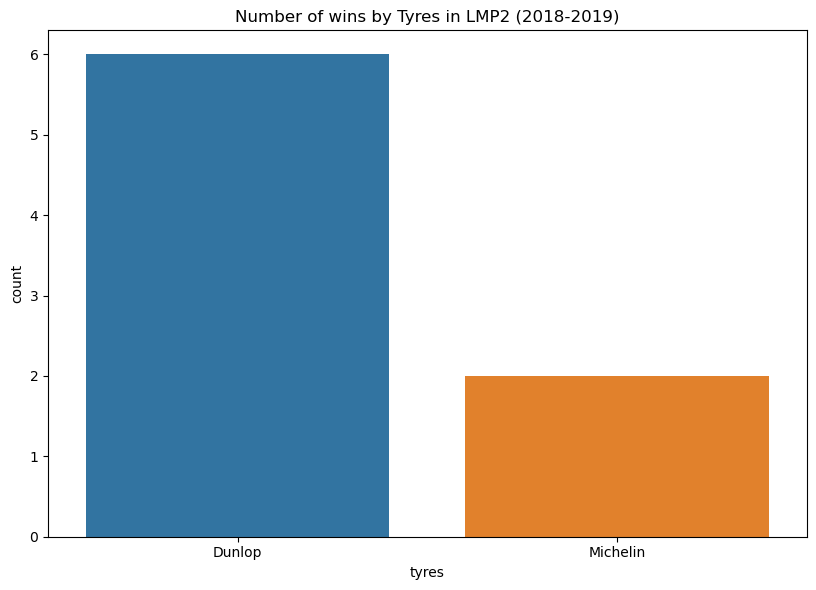

In [747]:
wec_analysis_2018_2019_season = wec_analysis[(wec_analysis['season'].isin(['2018-2019'])) & (wec_analysis['class'] == 'LMP2') & (wec_analysis['class_position'] == 1)]

if not wec_analysis_2018_2019_season.empty:
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x='tyres', data=wec_analysis_2018_2019_season)
    plt.title('Number of wins by Tyres in LMP2 (2018-2019)')
    
    plt.tight_layout()
    plt.show()
else:
    print("No data points available for the '2018-2019' season in LMP2 class with Class Position = 1.")

We can see that in the Season 2018-2019, Dunlop won 6 races compared to Michelin's 2 in the LMP2 class

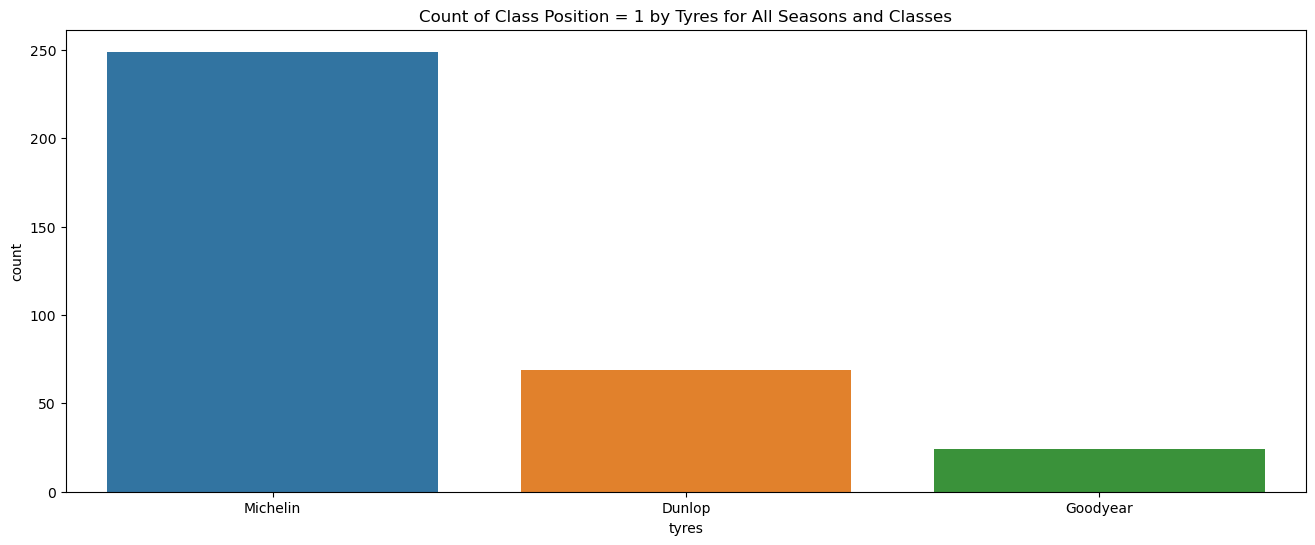

In [749]:
wec_analysis_all_seasons_classes = wec_analysis[wec_analysis['class_position'] == 1]

if not wec_analysis_all_seasons_classes.empty:
    plt.figure(figsize=(16, 6))
    
    sns.countplot(x='tyres', data=wec_analysis_all_seasons_classes)
    plt.title('Count of Class Position = 1 by Tyres for All Seasons and Classes')
    
    plt.show()
else:
    print("No data points available for Class Position = 1 across all seasons and classes.")

We can see that Michelin is by far the most dominant tyre supplier with almost 250 wins (on all classes), followed by Dunlop and Goodyear. Pirelli and Hankook never won a race at the time of this analysis.

In [735]:
# Save the wec_analysis DataFrame to a CSV file
wec_analysis.to_csv('C:\Data Science\\Projetos\\wec-analysis\\Notebooks\\wec_data_clean.csv', index=False)